In [ ]:
!unzip archive\ \(3\).zip

Archive:  archive (3).zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: [n]0
error:  invalid response [[n]0]
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight


In [ ]:
data = pd.read_csv('heart.csv')
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})
data['ChestPainType'] = data['ChestPainType'].astype('category').cat.codes
data['RestingECG'] = data['RestingECG'].astype('category').cat.codes
data['ExerciseAngina'] = data['ExerciseAngina'].map({'Y': 1, 'N': 0})
data['ST_Slope'] = data['ST_Slope'].astype('category').cat.codes
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (734, 11)
y_train shape: (734,)


In [ ]:

print("Unique classes in y_train:", np.unique(y_train))


classes = np.unique(y_train)
class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
class_weights_dict = dict(enumerate(class_weights))

print("Class Weights Dictionary:", class_weights_dict)

if len(class_weights_dict) < len(classes):
    print("Warning: Class weights dictionary does not cover all classes.")

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, class_weight=class_weights_dict)


Unique classes in y_train: [0 1]
Class Weights Dictionary: {0: 1.102102102102102, 1: 0.9152119700748129}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyError: 1

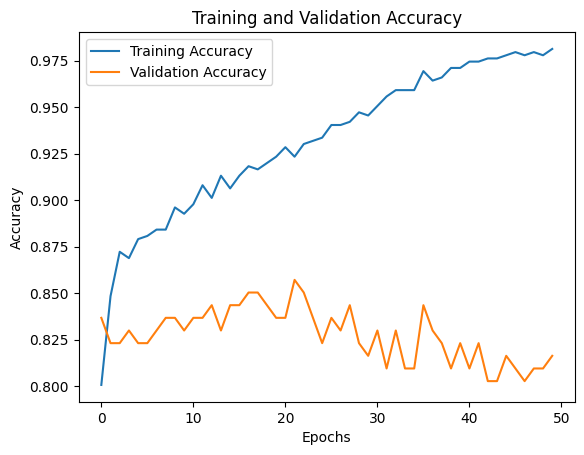

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.33      0.49      0.40        77
           1       0.43      0.28      0.34       107

    accuracy                           0.37       184
   macro avg       0.38      0.39      0.37       184
weighted avg       0.39      0.37      0.36       184



In [ ]:
def predict_heart_disease(model):
    print("Enter the following details:")

    age = int(input("Age: "))
    sex_input = input("Sex (M/F): ")
    chest_pain_type_input = input("Chest Pain Type (ATA/NAP/ASY/TA): ")
    resting_bp = int(input("Resting Blood Pressure: "))
    cholesterol = int(input("Cholesterol: "))
    fasting_bs = int(input("Fasting Blood Sugar (0: No, 1: Yes): "))
    resting_ecg_input = input("Resting ECG (Normal/LVH/ST): ")
    max_hr = int(input("Max Heart Rate: "))
    exercise_angina_input = input("Exercise Angina (Y/N): ")
    oldpeak = float(input("Oldpeak: "))
    st_slope_input = input("ST Slope (Up/Flat/Down): ")

    sex = 1 if sex_input.upper() == 'M' else 0
    chest_pain_type = {'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3}[chest_pain_type_input.upper()]
    resting_ecg = {'Normal': 0, 'LVH': 1, 'ST': 2}[resting_ecg_input]
    exercise_angina = 1 if exercise_angina_input.upper() == 'Y' else 0
    st_slope = {'Up': 0, 'Flat': 1, 'Down': 2}[st_slope_input]

    features = np.array([[age, sex, chest_pain_type, resting_bp, cholesterol,
                          fasting_bs, resting_ecg, max_hr, exercise_angina,
                          oldpeak, st_slope]])

    prediction = model.predict(features)

    if prediction[0][0] > 0.5:
        print("Prediction: Heart Disease Detected")
    else:
        print("Prediction: No Heart Disease Detected")



In [ ]:
predict_heart_disease(model)

Enter the following details:
Age: 65
Sex (M/F): M
Chest Pain Type (ATA/NAP/ASY/TA): NAP
Resting Blood Pressure: 150
Cholesterol: 250
Fasting Blood Sugar (0: No, 1: Yes): 1
Resting ECG (Normal/LVH/ST): ST
Max Heart Rate: 80
Exercise Angina (Y/N): Y
Oldpeak: 2.5
ST Slope (Up/Flat/Down): Down
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: No Heart Disease Detected
